#### Importing NumPy, Pandas, Seaborn, Matplotlib and Warnings Libraries ####

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [52]:
# Load the data
csv_file = 'Downloads/wSW4Bvy1YFd47nT4GSTe6q/Topmate_Data_Analytics_Bootcamp/SBI General Insurance Uses Case/Dataset/vehicle_insurance_data.csv'
data = pd.read_csv(csv_file)

In [54]:
# Show top 5 records
data.head(5)

,Ã¯Â»Â¿dealer,zone,state,location,policy,pol_id,consumer,pol_type,addon_prod,brand,...,bank,bank_city,package,financer,fin_branch,road_tax,registration_charges,on_road_price,dt_policy_expiry,policy_term_month
0,Spice Route Auto Haven,Central,Madhya Pradesh,Gwalior,ICICI Lombard General,TIL/000000002,Mr. GUNDE GOWDA D J,TP Renewal,Yes,Mercedes-Benz,...,KARNATAKA BANK LIMITED,BANGALORE,ADDON,HONDA FINANCES,BANGALORE,NaN,NaN,767230,2023-11-18,36
1,Lotus Lake Auto Hub,South,Telangana,Suryapet,ICICI Lombard General,TIL/000000003,Mr. SHARANAPPA GOUD,TP Renewal,Yes,MG Motor,...,DHANLAXMI BANK LIMITED,BANGALORE,ADDON,NaN,NaN,NaN,NaN,767230,2023-02-25,12
2,Green Valley Drives,West,Gujarat,Surat,ICICI Lombard General,TIL/000000004,Mr. REVANEPPA H MALAGI,TP Renewal,Yes,BMW,...,DHANLAXMI BANK LIMITED,BANGALORE,ADDON,HONDA FINANCES,BANGALORE,NaN,NaN,751223,2021-02-01,12
3,Indigo Autos,North-East,Nagaland,Kohima,ICICI Lombard General,TIL/000000005,Mr. RAVI S K,TP Renewal,No,Datsun,...,DHANLAXMI BANK LIMITED,BANGALORE,STANDARD,HONDA FINANCES,BANGALORE,NaN,NaN,599432,2023-05-23,12
4,Sunflower Auto World,North,Jammu and Kashmir,Srinagar,ICICI Lombard General,TIL/000000006,Mr. PRAKASHA S N,TP Renewal,Yes,Datsun,...,SVC CO OPERATIVE BANK LTD,BANGLORE,ADDON,HONDA FINANCES,BANGALORE,NaN,NaN,721300,2024-08-04,36


In [56]:
# Return column labels of the Dataframe
data.columns

Index(['Ã¯Â»Â¿dealer', 'zone', 'state', 'location', 'policy', 'pol_id',
       'consumer', 'pol_type', 'addon_prod', 'brand', 'product',
       'vehicle_type', 'fuel_type', 'transmission', 'dt_pol_create',
       'dt_pol_effect', 'insurance_declared_value', 'addon_premium',
       'rti_premium', 'od_premium', 'third_party_liability', 'pa_cover',
       'legal_liability', 'liability', 'service_tax', 'gross_premium',
       'payment_mode', 'dt_cheque', 'bank', 'bank_city', 'package', 'financer',
       'fin_branch', 'road_tax', 'registration_charges', 'on_road_price',
       'dt_policy_expiry', 'policy_term_month'],
      dtype='object')

In [58]:
# Shape of the dataset
data.shape

(35066, 38)

#### Q1. Find the Unique Count of Total Customers ? ####

In [63]:
unique_customers = data['consumer'].nunique()
print("Total Unique Customers:", unique_customers)

Total Unique Customers: 16886


#### Q2. Find the Unique Count of Total Policies ? ####

In [66]:
unique_policies = data['pol_id'].nunique()
print("Total Unique Customers:", unique_policies)

Total Unique Customers: 35064


#### Q3. Find out the Total Policies by Year ? ####

In [81]:
# Convert the policy creation date column to date-time column
data['dt_pol_create'] = pd.to_datetime(data['dt_pol_create'], errors = 'coerce')

# Extract year from policy creation date
data['year'] = data['dt_pol_create'].dt.year

# Calculate the yearly total count of policies
yearly_policy_count = data.groupby('year')['pol_id'].count().reset_index()
yearly_policy_count.columns = ['Year','Total Policies']
print(yearly_policy_count)

   Year  Total Policies
0  2020            8744
1  2021            8927
2  2022            8672
3  2023            8723


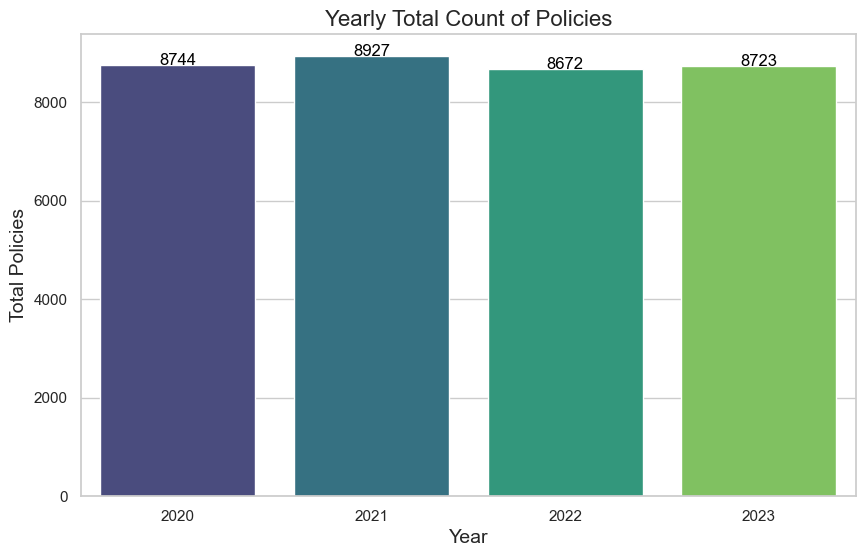

In [89]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Year', y='Total Policies', data=yearly_policy_count, palette='viridis')

# Add titles and labels
plt.title('Yearly Total Count of Policies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Policies', fontsize=14)

# Add values on top of the bars
for index, row in yearly_policy_count.iterrows():
    bar_plot.text(row.name, row['Total Policies'], round(row['Total Policies'], 2), color='black', ha="center")

# Show the plot
plt.show()

#### Q4. What are the top 10 banks with the highest count of unique customers ? ####

In [92]:
# Calculate the unique count of customers by bank
customers_by_bank = data.groupby('bank')['consumer'].nunique().reset_index()
customers_by_bank.columns = ['Bank','Total Customers']

# Sort by Total Customers in descending order
customers_by_bank = customers_by_bank.sort_values(by = 'Total Customers', ascending=False)

# Select Top 10 banks
Top_10_banks = customers_by_bank.head(10)

# Print the banks list
print(Top_10_banks)

                                    Bank  Total Customers
19                               AMEX CC            10179
18  AMERICAN EXPRESS BANKING CORPORATION             7076
44                DHANLAXMI BANK LIMITED             4471
3                                    ACH             1410
67                        ONLINE PAYMENT              361
83                   STATE BANK OF INDIA              346
49                        HDFC BANK LTD.              304
53                    ICICI BANK LIMITED              225
28                           CANARA BANK              187
21                         AXIS BANK LTD              132


#### Q5. Find out the total customers by payment mode ? ####

In [95]:
# Calculate total customers by payment mode
customers_by_payment_mode = data.groupby('payment_mode')['consumer'].nunique().reset_index()
customers_by_payment_mode.columns = ['Payment Mode', 'Total Customers']

# Print the result
print(customers_by_payment_mode)

          Payment Mode  Total Customers
0                 Cash              456
1         Direct Debit            11202
2          Installment             1849
3                 Loan               30
4                Other              654
5  Unknown/Unspecified            10181


#### Q6. Find out the total count of customers by policy type ? ####

In [99]:
# Calculate the total customers by policy type
customers_by_policy_type = data.groupby('pol_type')['consumer'].nunique().reset_index()
customers_by_policy_type.columns = ['Policy Type', 'Total Customers']

# Print the result
print(customers_by_policy_type)

       Policy Type  Total Customers
0    First Renewal              561
1              NEW              561
2      NTP Renewal             5140
3              New             7648
4  Seconed Renewal              561
5       TP Renewal             9160


#### Q7. Find out the total count of customers by policy ? ####

In [103]:
# Calculate the total customers by policy
customers_by_policy = data.groupby('policy')['consumer'].nunique().reset_index()
customers_by_policy.columns = ['Policy', 'Total Customers']

# Print the result
print(customers_by_policy)

                   Policy  Total Customers
0   Bajaj Allianz General             3398
1  Cholamandalam MS Gener             4401
2   ICICI Lombard General             6563
3  IFFCO Tokio General In              821
4  Reliance General Insur             3102
5   SBI General Insurance             2703
6  The New India Assuranc                4
7  United India Insurance               61


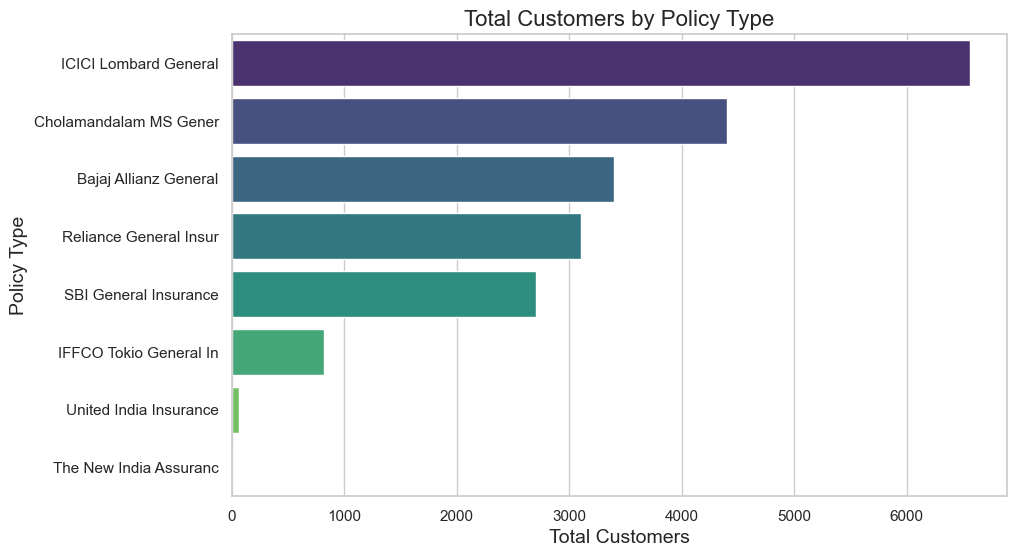

In [105]:
# Sort the data by total customers in descending order
customers_by_policy = customers_by_policy.sort_values(by='Total Customers', ascending=False)

# Create a bar plot
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x = 'Total Customers', y = 'Policy', data = customers_by_policy, palette = 'viridis')

# Add titles and labels
plt.title('Total Customers by Policy Type', fontsize = 16)
plt.xlabel('Total Customers', fontsize = 14)
plt.ylabel('Policy Type', fontsize  = 14)

# Show the plot
plt.show()

#### Q8. Find out the total count of policies by vehicle type ? ####

In [109]:
# Calculate the total customers by vehicle type
customers_by_vehicle_type = data.groupby('vehicle_type')['pol_id'].count().reset_index()
customers_by_vehicle_type.columns = ['Vehicle_Type', 'Total Policies']

# Sort the data by total policy count in descending order
customers_by_vehicle_type = customers_by_vehicle_type.sort_values(by='Total Policies', ascending=False)

# Print the result
print(customers_by_vehicle_type)

  Vehicle_Type  Total Policies
4          SUV           17497
1    Hatchback            6740
5        Sedan            6626
2          MPV            2128
6   Sports Car             670
3       Pickup             663
7        Wagon             390
0        Coupe             352


#### Q9. Find out the total count of customers by policy type ? ####

In [112]:
# Calculate the total customers by policy type
customers_by_policy_type = data.groupby('pol_type')['consumer'].nunique().reset_index()
customers_by_policy_type.columns = ['Policy Type', 'Total Customers Count']

# Sort the total customers count in descending order
customers_by_policy_type = customers_by_policy_type.sort_values(by='Total Customers Count', ascending = False)

# Print the result
print(customers_by_policy_type)

       Policy Type  Total Customers Count
5       TP Renewal                   9160
3              New                   7648
2      NTP Renewal                   5140
0    First Renewal                    561
1              NEW                    561
4  Seconed Renewal                    561


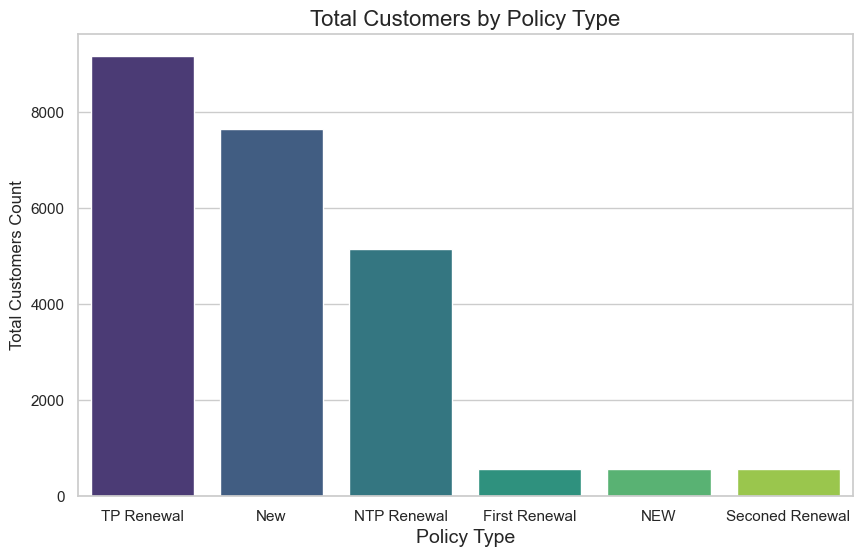

In [114]:
# Create a bar plot
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x='Policy Type', y='Total Customers Count', data=customers_by_policy_type, palette = 'viridis')

# Add the titles and labels
plt.title('Total Customers by Policy Type', fontsize = 16)
plt.xlabel('Policy Type', fontsize = 14)
plt.ylabel('Total Customers Count')

# Show the plot
plt.show()

#### Q10. What is our overall performance in vehicle insurance ? ####

In [117]:
# Total number of policies collected
total_policies = data['pol_id'].nunique()

# Total premium amount collected
total_premium = data['gross_premium'].sum()

# Print the result
print('Total policies collected are:', total_policies)
print('Total premium amount collected:', total_premium)

Total policies collected are: 35064
Total premium amount collected: 1419881376


In [121]:
# Calculate the unique count of customers
unique_customers = data['consumer'].nunique()

# Calculate the total insurance declared value
total_insured_value = data['insurance_declared_value'].sum()

# Calculate the total number of policies
total_policies = data['pol_id'].nunique()

# Display the results
print('Total number of unique customers are:', unique_customers)
print('Total insured value is:', total_insured_value)
print('Total number of running policies are:', total_policies)

Total number of unique customers are: 16886
Total insured value is: 34631375975
Total number of running policies are: 35064


#### Q11. Find out the top 10 policies by state ? ####

In [124]:
# Calculate the total number of policies by state
policies_by_state = data.groupby('state')['pol_id'].count().reset_index()
policies_by_state.columns = ['State', 'Total Policies']

# Sort the data by Total Policies in descending order
policies_by_state = policies_by_state.sort_values(by='Total Policies', ascending = False).head(10)

# Display the result
print(policies_by_state)

             State  Total Policies
22       Telangana            3315
15     Maharashtra            3126
5     Chhattisgarh            1978
14  Madhya Pradesh            1919
10       Jharkhand            1893
23   Uttar Pradesh            1889
20       Rajasthan            1876
4            Bihar            1694
7          Haryana            1680
6          Gujarat            1632


#### Q12. How are my customers Distributed over Banks ? ####

In [127]:
# Calculate the total customers for each bank
customers_by_bank = data.groupby('bank')['consumer'].nunique().reset_index()
customers_by_bank.columns = ['Bank', 'Total Customers']

# Sort the values by Total number of Customers in descending order
customers_by_bank = customers_by_bank.sort_values(by='Total Customers', ascending=False).head(10)

# Calculate the total customers by payment mode
customers_by_payment_mode = data.groupby('payment_mode')['consumer'].nunique().reset_index()
customers_by_payment_mode.columns = ['Payment Mode', 'Total Custmers']

# Display the result
print('Top 10 Banks by Customer Count:')
print(customers_by_bank)

Top 10 Banks by Customer Count:
                                    Bank  Total Customers
19                               AMEX CC            10179
18  AMERICAN EXPRESS BANKING CORPORATION             7076
44                DHANLAXMI BANK LIMITED             4471
3                                    ACH             1410
67                        ONLINE PAYMENT              361
83                   STATE BANK OF INDIA              346
49                        HDFC BANK LTD.              304
53                    ICICI BANK LIMITED              225
28                           CANARA BANK              187
21                         AXIS BANK LTD              132


In [129]:
print('Total number of unique customers by payment mode:')
print(customers_by_payment_mode)

Total number of unique customers by payment mode:
          Payment Mode  Total Custmers
0                 Cash             456
1         Direct Debit           11202
2          Installment            1849
3                 Loan              30
4                Other             654
5  Unknown/Unspecified           10181


   #### OBSERVATION: Amex cc is popular amongst customers and they like the Direct Debit Facility of payment mode.

#### Q13. How do the average gross premiums differ among various insurance packages and vehicle types ? ####

In [139]:
# Average Gross Premium by Package
avg_gross_premium_by_package = data.groupby('package')['gross_premium'].mean().reset_index()
avg_gross_premium_by_package.columns = ['Package', 'Average Gross Premium']
avg_gross_premium_by_package = avg_gross_premium_by_package.sort_values(by='Average Gross Premium', ascending=False)

# Average Gross Premium by Vehicle Types
avg_gross_premium_by_vehicle_type = data.groupby('vehicle_type')['gross_premium'].mean().reset_index()
avg_gross_premium_by_vehicle_type.columns = ['Package', 'Average Gross Premium']
avg_gross_premium_by_vehicle_type = avg_gross_premium_by_vehicle_type.sort_values(by='Average Gross Premium', ascending=False)

# Display the results
print('Average Gross Premium by Package:')
print(avg_gross_premium_by_package)

print('Average Gross Premium by Vehicle Type:')
print(avg_gross_premium_by_vehicle_type)

Average Gross Premium by Package:
     Package  Average Gross Premium
4     LUXURY           84679.078935
6        RTI           76770.666667
7   STANDARD           65483.433333
5    PREMIUM           59505.161795
1    ADVANCE           39637.263836
0      ADDON           38315.629630
2    DELIGHT           29042.776817
8   SUPERIOR           27084.889888
3  ESSENTIAL           18215.136753
9     Select           11927.384615
Average Gross Premium by Vehicle Type:
      Package  Average Gross Premium
0       Coupe           41767.275568
1   Hatchback           41104.533976
2         MPV           40506.812030
5       Sedan           40404.866888
4         SUV           40362.823398
6  Sports Car           40309.071642
3      Pickup           39271.324284
7       Wagon           38311.038462


   #### OBSERVATION: Luxury and RTI Package are popular in high end customers whose top 3 vehicle type choices are Sports Car, MPV, SUV.

#### Q14. Which regions and categories contribute the most to the sales ? ####

In [145]:
# Total Gross Premium by State
gross_premium_by_state = data.groupby('state')['gross_premium'].sum().reset_index()
gross_premium_by_state.columns = ['State', 'Total Gross Premium']
gross_premium_by_state = gross_premium_by_state.sort_values(by='Total Gross Premium', ascending=False).head(10)

# Total Gross Premium by Vehicle Type
gross_premium_by_vehicle_type = data.groupby('vehicle_type')['gross_premium'].sum().reset_index()
gross_premium_by_vehicle_type.columns = ['Vehicle Type', 'Total Gross Premium']
gross_premium_by_vehicle_type = gross_premium_by_vehicle_type.sort_values(by='Total Gross Premium', ascending=False)

# Display the result
print('Total Gross Premium by State:')
print(gross_premium_by_state)

print('Total Gross Premium by Vehicle Type:')
print(gross_premium_by_vehicle_type)

Total Gross Premium by State:
             State  Total Gross Premium
22       Telangana            133670003
15     Maharashtra            128361682
5     Chhattisgarh             78182496
10       Jharkhand             77810559
23   Uttar Pradesh             77343272
14  Madhya Pradesh             75293993
20       Rajasthan             74625798
7          Haryana             70595736
4            Bihar             68608955
6          Gujarat             65308744
Total Gross Premium by Vehicle Type:
  Vehicle Type  Total Gross Premium
4          SUV            706228321
1    Hatchback            277044559
5        Sedan            267722648
2          MPV             86198496
6   Sports Car             27007078
3       Pickup             26036888
7        Wagon             14941305
0        Coupe             14702081


## Outcome: ##
In conclusion, our analysis reveals distinct preferences and behaviors among our clientele. High-end customers exhibit a strong preference for          luxury and the RTI Package, with Sports Cars, MPVs, and SUVs emerging as their vehicles of choice. Furthermore, there's a noticeable trend towards      TP Renewal, with SUVs standing out as the favored vehicle type. The payment preferences of our customers lean towards the convenience of American       Express credit cards and the Direct Debit Facility, highlighting their desire for streamlined transactions. Impressively, our current customer base     encompasses 16,891 individuals, collectively insuring an amount of $34.6 billion across 35,066 policies.